### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [78]:
data = pd.read_csv('data/coupons.csv')

In [79]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [80]:
data.info()

# get the count of missing values in each column
md = data.isnull().sum()
print("Missing Data Count: \n", md)

# Check the data types of each column
dt = data.dtypes
print("\nData Types: \n", dt)

# Use the describe method to get a statistical summary of numerical columns, which could help identify outliers
sumr = data.describe()
print("\nSummary Statistics: \n", sumr)

# Check for duplicate rows
dups = data[data.duplicated()]
print("\nDuplicate Rows: \n", dups)

# Invalid Data
# Check for any negative numbers in columns where it doesn't make sense (e.g., temperature)
invd = data[data['temperature'] < 0]
print("\nInvalid Temperature Data: \n", invd)

# For categorical data, check unique values to ensure consistency. 
# For example, checking unique values in the 'gender' column
genders = data['gender'].unique()
print("\nUnique Gender Values: \n", genders)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [81]:
# Dropping 'car' column due to the high volume of missing data
# car                     12576
data = data.drop(columns = ['car'])

# Filling missing values with mode for the rest of the columns with missing values
# Bar                       107
# CoffeeHouse               217
# CarryAway                 151
# RestaurantLessThan20      130
# Restaurant20To50          189
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    data[column] = data[column].fillna(data[column].mode()[0])
    
# Removing duplicate rows
data = data.drop_duplicates()    

4. What proportion of the total observations chose to accept the coupon? 



In [82]:
# Count the number of instances where the coupon was accepted
ac = data['Y'].sum()

print(ac)

# Get the total number of observations
tobs = len(data)

# Calculate the proportion
ap = ac / tobs

# Convert the proportion to a percentage for easier interpretation
app = ap * 100

# Print the result
print(f'The proportion of observations where the coupon was accepted is {ap:.2f} or {app:.2f}%')

7157
The proportion of observations where the coupon was accepted is 0.57 or 56.76%


5. Use a bar plot to visualize the `coupon` column.

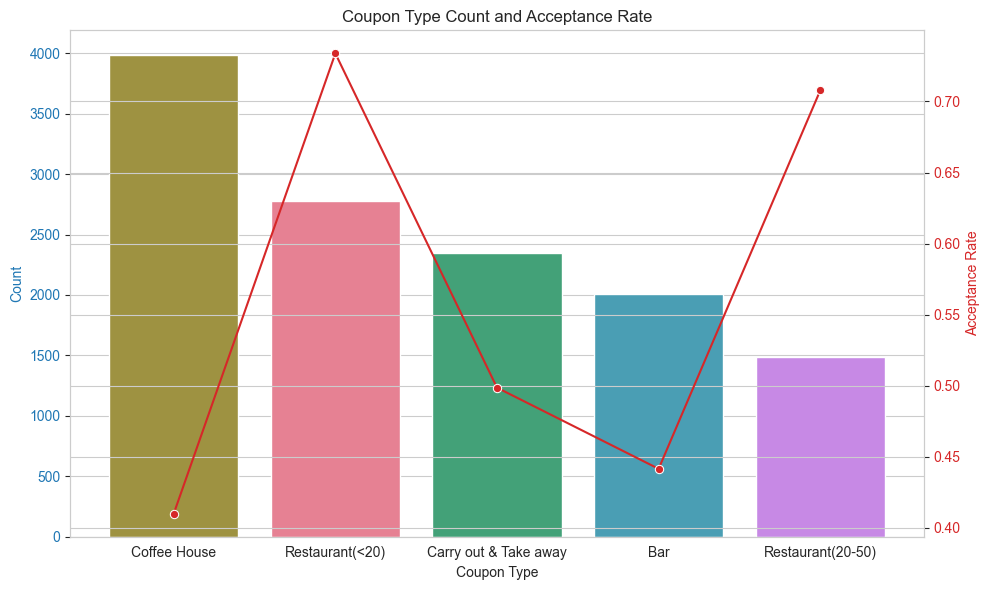

In [83]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

uc = data['coupon'].unique()
palette = {coupon: sns.color_palette('husl', len(uc))[i] for i, coupon in enumerate(uc)}

# Create a bar plot for the coupon counts
color = 'tab:blue'
sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index, ax=ax1, color=color, palette=palette)
ax1.set_ylabel('Count', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Coupon Type')

# Create a second Y axis for the acceptance rates
ax2 = ax1.twinx() 

# Calculate the mean acceptance rate for each coupon type
ar = data.groupby('coupon')['Y'].mean()

# Create a line plot for the acceptance rates
color = 'tab:red'
sns.lineplot(x=ar.index, y=ar.values, sort=False, ax=ax2, color=color, marker='o')
ax2.set_ylabel('Acceptance Rate', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set the title and adjust the layout
plt.title('Coupon Type Count and Acceptance Rate')
plt.xticks(rotation=90)
plt.tight_layout()

# save it
plt.savefig('images/coupon_columns.png')

# Display the plot
plt.show()


6. Use a histogram to visualize the temperature column.

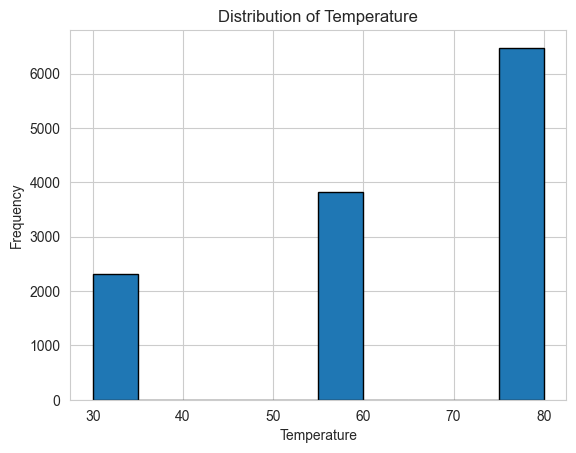

<Figure size 640x480 with 0 Axes>

In [84]:
# Plotting a histogram for the 'temperature' column
plt.hist(data['temperature'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

plt.savefig('images/temp_histogram.png')

# Displaying the plot
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [85]:
bar_data = data[data['coupon'] == 'Bar']
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [86]:
# Assuming that 1 in the column 'Y' indicates acceptance of the coupon
ap = bar_data['Y'].mean()

# To convert the proportion to a percentage
app = ap * 100

print(f'The proportion of bar coupons accepted is {ap:.2f} or {app:.2f}%')

The proportion of bar coupons accepted is 0.41 or 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


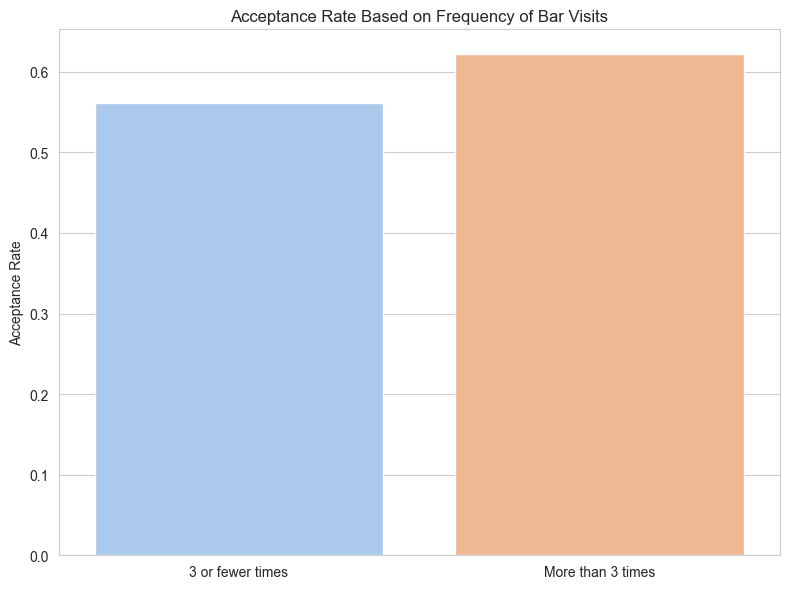

<Figure size 640x480 with 0 Axes>

In [87]:
# Step 1: Define the two groups based on 'Bar' column
tol = ['never', 'less1', '1~3']
mtt = ['4~8', 'gt8']

# Step 2: Calculate the acceptance rate for each group
tolr = data[data['Bar'].isin(tol)]['Y'].mean()
mttr = data[data['Bar'].isin(mtt)]['Y'].mean()

ar = pd.Series({'3 or fewer times': tolr, 'More than 3 times': mttr})

# Step 3: Plot the acceptance rates
plt.figure(figsize=(8, 6))
sns.barplot(x=ar.index, y=ar.values, palette='pastel')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Based on Frequency of Bar Visits')
plt.tight_layout()
plt.savefig('images/acceptance_rate_per_freq.png')
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


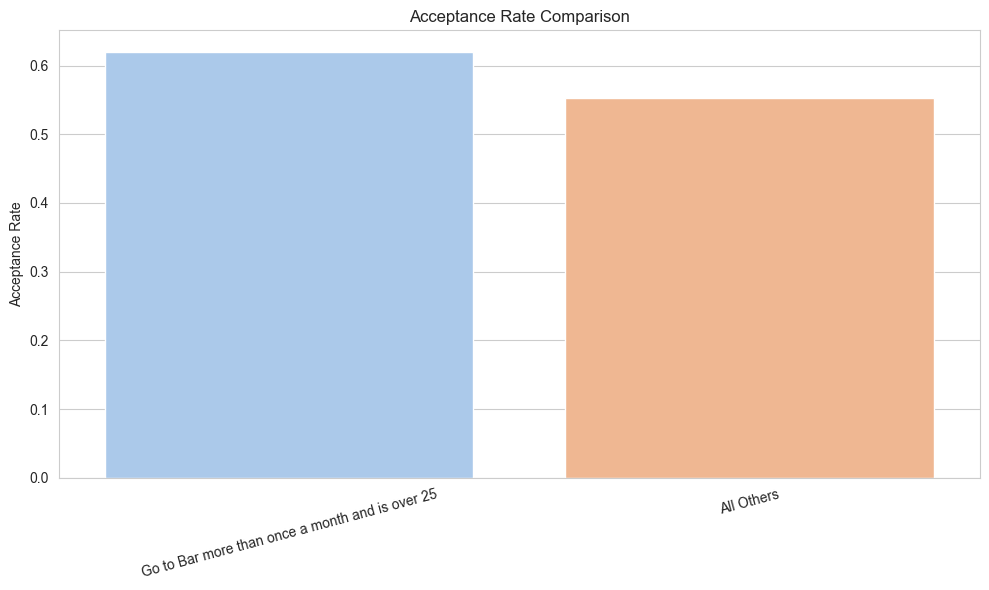

<Figure size 640x480 with 0 Axes>

In [88]:
# Convert the 'age' column to integers
data['age'] = data['age'].replace('50plus', 51)  # you can change 50 to another number if needed
data['age'] = data['age'].replace('below21', 20)  # you can change 50 to another number if needed

data['age'] = data['age'].astype(int)

# Define the specific group based on 'Bar' and 'Age' columns
sg = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'] > 25)]

# Define the other group as those not in the specific group
og = data.drop(sg.index)

# Calculate the acceptance rates
sgr = sg['Y'].mean()
ogr = og['Y'].mean()

ar = pd.Series({'Go to Bar more than once a month and is over 25': sgr,
                             'All Others': ogr})

# Plot the acceptance rates
plt.figure(figsize=(10, 6))
sns.barplot(x=ar.index, y=ar.values, palette='pastel')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Comparison')
plt.xticks(rotation=15)  # Rotate x-labels slightly for readability
plt.tight_layout()
plt.savefig('images/acceptance_rate_frequent_and_over25.png')
plt.show()





5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


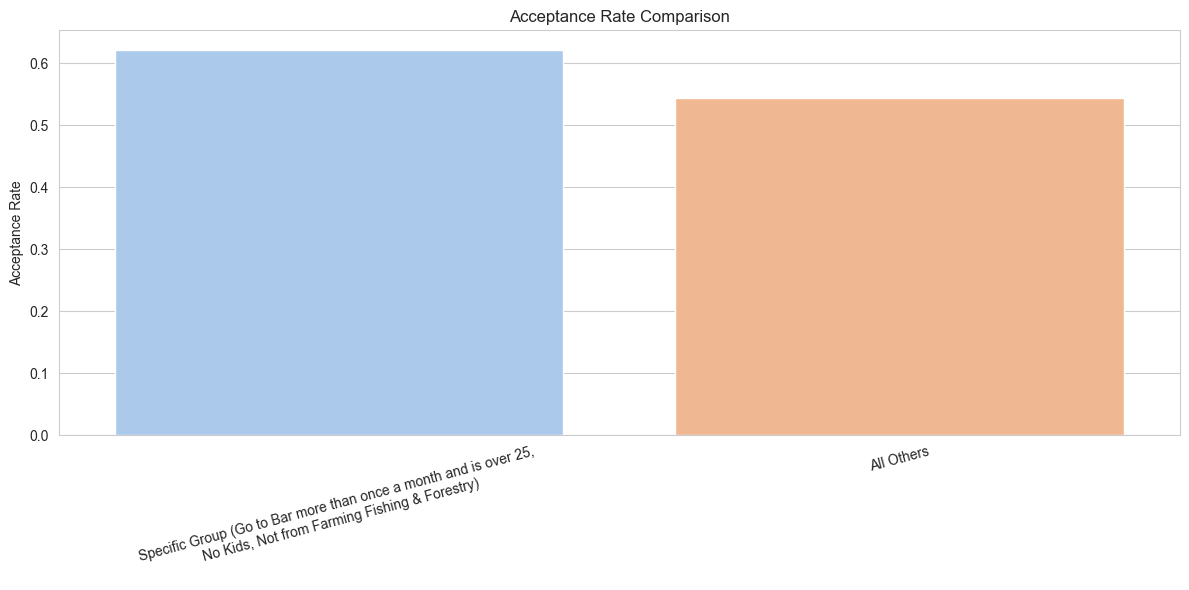

<Figure size 640x480 with 0 Axes>

In [89]:
# Filter the specific group based on 'Bar', 'PassengerType', and 'Occupation' columns
print(data['occupation'].unique())

sg = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (data['passanger'] != 'Kid(s)') &  # Assuming the value representing kids is 'kid'
    (~data['occupation'].isin(['Farming Fishing & Forestry']))
]

# Define the other group as those not in the specific group
og = data.drop(sg.index)

# Calculate the acceptance rates
sgr = sg['Y'].mean()
ogr = og['Y'].mean()

ar = pd.Series({
    'Specific Group (Go to Bar more than once a month and is over 25,\nNo Kids, Not from Farming Fishing & Forestry)': sgr,
    'All Others': ogr
})

# Plot the acceptance rates
plt.figure(figsize=(12, 6))
sns.barplot(x=ar.index, y=ar.values, palette='pastel')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Comparison')
plt.xticks(rotation=15)  # Rotate x-labels slightly for readability
plt.tight_layout()
plt.savefig('images/acceptance_rate_frequent_and_nokid_nohillybilly.png')
plt.show()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance rate for Group 1: 62.23%
Acceptance rate for Group 2: 62.75%
Acceptance rate for Group 3: 60.03%


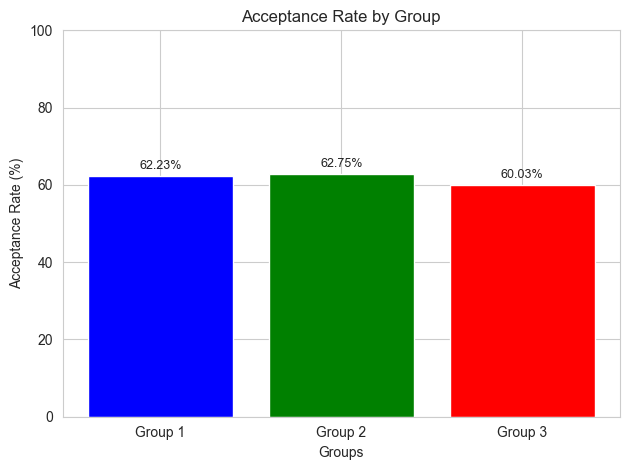

<Figure size 640x480 with 0 Axes>

In [90]:
# Group 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
g1m = (
    data['Bar'].isin(['1~3', '4~8', 'gt8']) &
    ~data['passanger'].str.contains('Kid\\(s\\)', case = False, na = False) &
    ~data['maritalStatus'].str.contains('Widowed', case = False, na = False)
)
g1 = data[g1m]

# Group 2: go to bars more than once a month and are under the age of 30
data['age'] = pd.to_numeric(data['age'], errors='coerce')
g2m = (
    data['Bar'].isin(['1~3', '4~8', 'gt8']) &
    (data['age'] < 30)
)
g2 = data[g2m]

# Group 3: go to cheap restaurants more than 4 times a month and income is less than 50K
# Note: Converting income to numeric, removing '$' and ',' if present
g3m = (
    data['RestaurantLessThan20'].isin(['4~8', 'gt8']) &
    data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])
)
g3 = data[g3m]

# Step 2: Calculate the acceptance rate for each group
ar1 = g1['Y'].mean() * 100
ar2 = g2['Y'].mean() * 100
ar3 = g3['Y'].mean() * 100

# Step 3: Compare the acceptance rates
print(f'Acceptance rate for Group 1: {ar1:.2f}%')
print(f'Acceptance rate for Group 2: {ar2:.2f}%')
print(f'Acceptance rate for Group 3: {ar3:.2f}%')

# Acceptance rates
acceptance_rates = [ar1, ar2, ar3]
groups = ["Group 1", "Group 2", "Group 3"]

# Plot
plt.bar(groups, acceptance_rates, color=['blue', 'green', 'red'])
plt.xlabel('Groups')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate by Group')
plt.ylim(0, 100)  # To set y-axis limits from 0 to 100

# Display values on top of the bars
for i, v in enumerate(acceptance_rates):
    plt.text(i, v + 1, f"{v:.2f}%", ha="center", va="bottom", fontsize=9)

# Show the plot
plt.tight_layout()
plt.savefig('images/acceptance_rate_per_specific_group.png')
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who often frequent bars, particularly those aged over 25, seem more predisposed to accept bar vouchers. Such a tendency appears to remain consistent despite varying circumstances, such as the type of passengers they have or their economic status. The nature of passengers (specifically if they aren't children) and their profession (beyond farming, fishing, or forestry) seem to hold sway in a driver's decision to accept a bar voucher.

The uptake rates observed in groups 1, 2, and 3 further emphasise the idea that specific habits or conditions render drivers more open to bar vouchers. This could be influenced by regular visits to more affordable eateries, their younger age, or even the kind of passengers they carry.

Considering these findings, marketing campaigns or strategies aiming to boost the uptake of bar vouchers would do well to focus on these particular driver groups to achieve optimal results.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [91]:
for ctype in data['coupon'].unique():
    rcd = data[data['coupon'] == ctype]
    oar = rcd['Y'].mean() * 100
    print(f"Overall acceptance rate for {ctype} coupons: {oar:.2f}%")

Overall acceptance rate for Restaurant(<20) coupons: 70.78%
Overall acceptance rate for Coffee House coupons: 49.86%
Overall acceptance rate for Carry out & Take away coupons: 73.38%
Overall acceptance rate for Bar coupons: 41.00%
Overall acceptance rate for Restaurant(20-50) coupons: 44.15%


In [92]:
for rel in data['passanger'].unique():
    rate = rcd[rcd['passanger'] == rel]['Y'].mean() * 100
    print(f"Acceptance rate with {rel} as passenger: {rate:.2f}%")

Acceptance rate with Alone as passenger: 42.35%
Acceptance rate with Friend(s) as passenger: 46.43%
Acceptance rate with Kid(s) as passenger: 36.99%
Acceptance rate with Partner as passenger: 63.12%


In [93]:
for job in data['occupation'].unique():
    rate = rcd[rcd['occupation'] == job]['Y'].mean() * 100
    print(f"Acceptance rate for occupation {job}: {rate:.2f}%")

Acceptance rate for occupation Unemployed: 36.05%
Acceptance rate for occupation Architecture & Engineering: 50.00%
Acceptance rate for occupation Student: 43.75%
Acceptance rate for occupation Education&Training&Library: 40.57%
Acceptance rate for occupation Healthcare Support: 65.62%
Acceptance rate for occupation Healthcare Practitioners & Technical: 51.52%
Acceptance rate for occupation Sales & Related: 50.00%
Acceptance rate for occupation Management: 45.35%
Acceptance rate for occupation Arts Design Entertainment Sports & Media: 37.68%
Acceptance rate for occupation Computer & Mathematical: 52.69%
Acceptance rate for occupation Life Physical Social Science: 47.37%
Acceptance rate for occupation Personal Care & Service: 45.45%
Acceptance rate for occupation Community & Social Services: 38.46%
Acceptance rate for occupation Office & Administrative Support: 61.54%
Acceptance rate for occupation Construction & Extraction: 61.90%
Acceptance rate for occupation Legal: 53.85%
Acceptance

In [94]:
for icb in data['income'].unique():
    rate = rcd[rcd['income'] == icb]['Y'].mean() * 100
    print(f"Acceptance rate for income {icb}: {rate:.2f}%")

Acceptance rate for income $37500 - $49999: 43.60%
Acceptance rate for income $62500 - $74999: 36.46%
Acceptance rate for income $12500 - $24999: 38.05%
Acceptance rate for income $75000 - $87499: 44.95%
Acceptance rate for income $50000 - $62499: 49.75%
Acceptance rate for income $25000 - $37499: 51.10%
Acceptance rate for income $100000 or More: 49.28%
Acceptance rate for income $87500 - $99999: 37.38%
Acceptance rate for income Less than $12500: 36.00%
